In [67]:
import pandas as pd
from numpy.random import RandomState
from sklearn.model_selection import train_test_split



In [80]:
data = pd.read_csv('PCA_practice_dataset.csv')
data.head()
data.shape


(8041, 35)

In [69]:
rng = RandomState()

train = data.sample(frac=0.7, random_state=rng)
test = data.loc[~data.index.isin(train.index)]

In [70]:
train.shape

(5629, 35)

In [71]:
test.shape

(2412, 35)

In [72]:
tr=train.T
cov = np.cov(tr)
print(cov)
print(tr.shape)
eig_val,eig_vec = np.linalg.eig(cov)



[[0.19676064 0.17477971 0.01355127 ... 0.16555443 0.16000909 0.00445454]
 [0.17477971 0.21012193 0.03033754 ... 0.14887225 0.19420767 0.019748  ]
 [0.01355127 0.03033754 0.16661657 ... 0.00827454 0.0254467  0.11622363]
 ...
 [0.16555443 0.14887225 0.00827454 ... 0.19293186 0.1852968  0.01025146]
 [0.16000909 0.19420767 0.0254467  ... 0.1852968  0.24112325 0.02614064]
 [0.00445454 0.019748   0.11622363 ... 0.01025146 0.02614064 0.13085683]]
(35, 5629)


In [73]:
cov.shape

(35, 35)

Number of components is 3
[3.4880881213343855, 1.9358961602900107, 0.2472460596374545]
Number of components is 3
[3.4880881213343855, 1.9358961602900107, 0.2472460596374545]
Number of components is 4
[3.4880881213343855, 1.9358961602900107, 0.2472460596374545, 0.13713282115190661]
Number of components is 4
[3.4880881213343855, 1.9358961602900107, 0.2472460596374545, 0.13713282115190661]
Number of components is 5
[3.4880881213343855, 1.9358961602900107, 0.2472460596374545, 0.13713282115190661, 0.09484507987536277]
Number of components is 5
[3.4880881213343855, 1.9358961602900107, 0.2472460596374545, 0.13713282115190661, 0.09484507987536277]
Number of components is 6
[3.4880881213343855, 1.9358961602900107, 0.2472460596374545, 0.13713282115190661, 0.09484507987536277, 0.08423943525605151]
Number of components is 7
[3.4880881213343855, 1.9358961602900107, 0.2472460596374545, 0.13713282115190661, 0.09484507987536277, 0.08423943525605151, 0.05780437626071579]


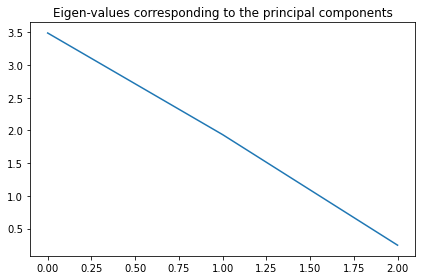

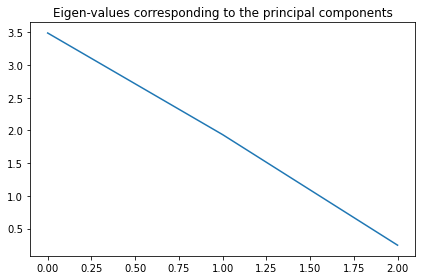

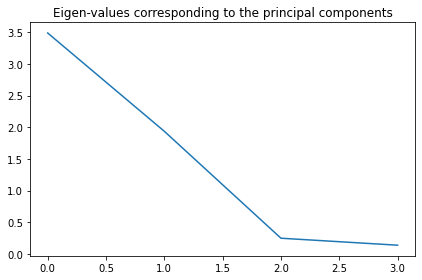

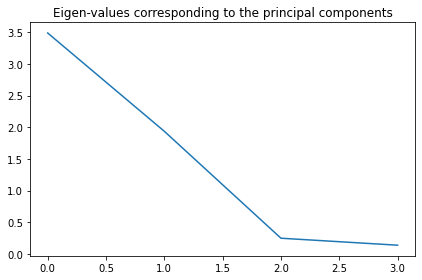

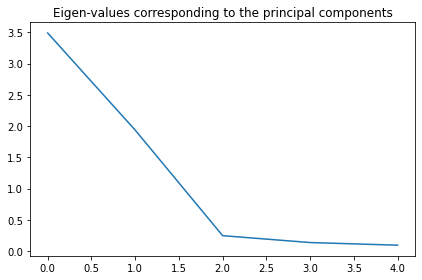

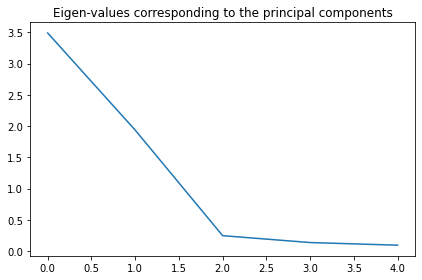

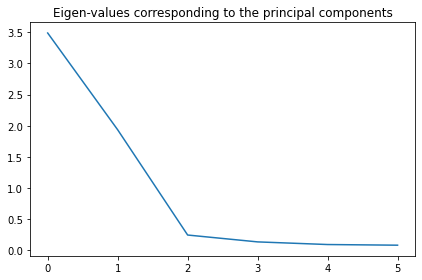

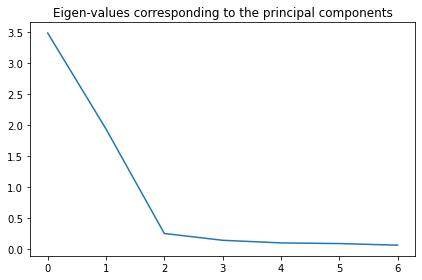

In [78]:
sort_idx = np.argsort(eig_val) 
sort_idx = sort_idx[::-1]

eig_val_sum = np.sum(eig_val)
temp_sum = 0
principal_eig_vec = []

principal_eig_val = []
j=0
for i in range(0,8):
    while(temp_sum<(0.9+0.01*i)*eig_val_sum):
        principal_eig_vec.append(eig_vec[sort_idx[j]])
        principal_eig_val.append(eig_val[sort_idx[j]])
        temp_sum += eig_val[sort_idx[j]]
        j += 1
    print("Number of components is {}".format(j))
    print(principal_eig_val)
    fig, ax = plt.subplots()
    ax.plot(principal_eig_val)
    ax.set_title("Eigen-values corresponding to the principal components")
    plt.tight_layout()